In [15]:
def bsort(arr, size):
    for i in range(size-1):
        sorted = True
        for j in range(size-i-1):
            if arr[j] > arr[j+1]:
                sorted = False
                temp = arr[j+1]
                arr[j+1] = arr[j]
                arr[j] = temp
        if sorted:
            break

In [14]:
from timeit import timeit
import numpy as np
# from bubblesort import bsort
ms_in_sec = 1000

n=2
a = [100,1002]

dur = timeit(lambda: bsort(a.shape[0],n), number=1)
print("fib:", round(dur * ms_in_sec, 1), "ms")


ImportError: cannot import name 'bsort' from 'bubblesort' (u:\VRU\4001\PLD\Peoject\sort_cython\bubblesort.py)

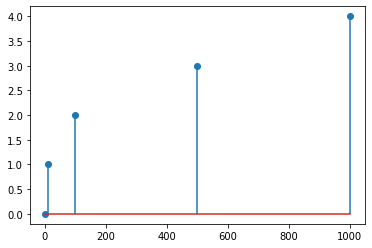

In [17]:
import matplotlib.pyplot as plt
import numpy as np

n = [2, 10, 100, 500, 1000]
t = [0, 1 , 2, 3 ,4]


x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(n, t)
plt.show()

In [137]:
import matplotlib.pyplot as plt
import matplotlib.colors 
from PIL import ImageColor
import matplotlib.pyplot as plt
import numpy as np

def save_plot(palett ):
    palett = list(map(lambda x:"#"+x.strip(),palett.split("#")[1:]))
    print(palett)
    n = [2, 10, 100, 500, 1000]
    n = list(map(lambda x:str(x),n))

    t1 = [0, 1 , 2, 3 ,4]
    t2 = [2, 4 , 5, 11 ,23]

    width = .35      # the width of the bars: can also be len(x) sequence


    for i in range(len(palett)):
        fig, ax = plt.subplots()
        
        r,g,b = ImageColor.getcolor(palett[(i+3)%len(palett)], "RGB")
        print (r,g,b)
        yiq = ((r*299)+(g*587)+(b*114))/1000
        text_color = "black" if yiq >= 128 else "white"
        print(text_color)
        plt.rcParams['text.color'] ='#{:02x}{:02x}{:02x}'.format(((255-r)%255), ((255-g)%255),((255-b)%255),)
        plt.rcParams['xtick.color'] ='#{:02x}{:02x}{:02x}'.format(((255-r)%255), ((255-g)%255),((255-b)%255),)
        plt.rcParams['ytick.color'] ='#{:02x}{:02x}{:02x}'.format(((255-r)%255), ((255-g)%255),((255-b)%255),)
        # plt.rcParams['board.color'] ='#{:02x}{:02x}{:02x}'.format(((255-r)%255), ((255-g)%255),((255-b)%255),)
        mokhalef = '#{:02x}{:02x}{:02x}'.format(((255-r)%255), ((255-g)%255),((255-b)%255),)
        ax.spines["top"].set_color(mokhalef)
        ax.spines["right"].set_color(mokhalef)
        ax.spines["left"].set_color(mokhalef)
        ax.spines["bottom"].set_color(mokhalef)
        ax.spines["bottom"].set_linestyle("-")
        
        plt.rcParams['axes.labelcolor'] =mokhalef
        ax.bar(n, t1, width,  label='Python',color=palett[i])

        ax.bar(n, t2, width,  bottom=t1,
            label='Cython',color=palett[(i+1)%len(palett)])

        ax.set_ylabel('Execution Time')
        ax.set_xlabel('Input')
        ax.set_title('Runtime by input size')
        ax.legend()

        plt.savefig("png/output"+f"_{i}", facecolor=palett[(i+2)%len(palett)], bbox_inches="tight",
                    pad_inches=0.3, transparent=True)
    plt.show()

In [ ]:
1
#F5F5F5
#F05454
#30475E
#121212

2,3
#064635
#519259
#F0BB62
#F4EEA9

4
#3C5186
#9B72AA
#C6B4CE
#FFF5DE
5
#440A67
#93329E
#B4AEE8
#FFE3FE
6
#77D970
#FF0075
#172774
#EEEEEE

['#FEE3EC', '#F9C5D5', '#F999B7', '#F2789F']
242 120 159
black
254 227 236
black
249 197 213
black
249 153 183
black


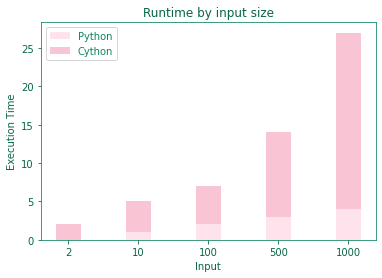

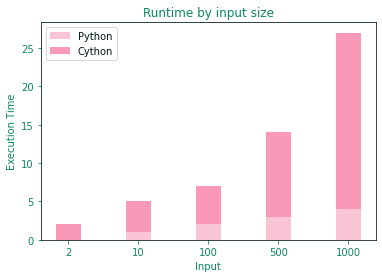

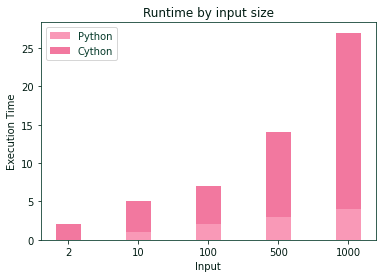

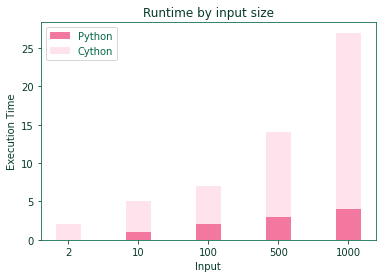

In [138]:

palett = """
#FEE3EC
#F9C5D5
#F999B7
#F2789F
"""
save_plot(palett)

C[500]: 0.3 ms
			 Cython :)
Cython[500]: 4.7 ms
Python[500]: 28.9 ms
C[1000]: 1.3 ms
			 Cython :)
Cython[1000]: 21.1 ms
Python[1000]: 160.2 ms
C[2000]: 5.7 ms
			 Cython :)
Cython[2000]: 83.3 ms
Python[2000]: 662.4 ms
C[4000]: 25.3 ms
			 Cython :)
Cython[4000]: 405.4 ms
Python[4000]: 2509.1 ms
['#77D970', '#FF0075', '#172774', '#EEEEEE']
119 217 112
black


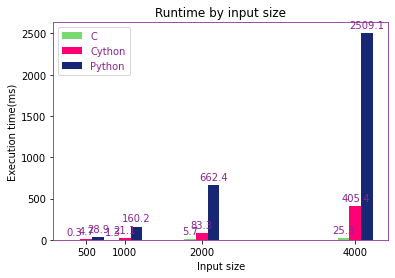

u:\VRU\4001\PLD\Peoject\sort_cython
It is


In [7]:
import sys
import os
from sort_c import bubblesort_caller
from sort_cython import bubblesort as cy_sort
from sort_python import bubblesort as py_sort

import matplotlib.pyplot as plt
import random
import timeit
import array
import create_plot
import numpy as np


def compare_code(n: list):
    t1, t2, t3 = [], [], []
    ms_in_sec = 1000

    for i in n:
        unsort = [random.randint(0, i) for _ in range(i)]

        arr1 = array.array('i', unsort)
        dur = timeit.timeit(
            lambda: bubblesort_caller.c_sort(arr1, i), number=1)
        print(f"C[{i}]:", round(dur * ms_in_sec, 1), "ms")
        t1.append(round(dur * ms_in_sec, 1))

        dur = timeit.timeit(lambda: cy_sort.bubbleSort(arr1), number=1)
        print(f"Cython[{i}]:", round(dur * ms_in_sec, 1), "ms")
        t2.append(round(dur * ms_in_sec, 1))

        dur = timeit.timeit(lambda: py_sort.bubbleSort(unsort), number=1)
        print(f"Python[{i}]:", round(dur * ms_in_sec, 1), "ms")
        t3.append(round(dur * ms_in_sec, 1))

    create_plot.save_plot(n, ("C", "Cython", "Python"), (t1, t2, t3))


# n = [100, 300, 400, ]
# compare_code(n)
n = [ 500, 1000, 2000,4000]
compare_code(n)